# Set up

Prior to Python, I had only used R, so I was surprised to learn that you need to import libraries for routine tasks like handling a dataframe, doing vectorized math, and data visualization. This is what we are doing below.

In [1]:
# Standard data science libraries
# Used for dataframes
import pandas as pd
# Used for doing math
import numpy as np
# Used for visualization
import matplotlib.pyplot as plt

# Making the plot show within our notebook
%matplotlib inline

# Allowing us to set the plot size
import pylab
pylab.rcParams['figure.figsize'] = (10, 10)

This makes Python read our data table

In [2]:
# Importing the csv
climate_essay_df = pd.read_csv('data_noID.csv')

# How big is this dataframe
climate_essay_df.shape

(1793, 104)

That's a lot of columns to deal with...
<br>Let's focus on the essays written about climate change and the respondants' education and essay

In [3]:
subsetted_df = climate_essay_df[climate_essay_df['trt1'] == 1]
subsetted_df = subsetted_df[['trt1', 'educ', 'essay']]
subsetted_df.shape

(589, 3)

In [4]:
subsetted_df.head(5)

,trt1,educ,essay
0,1,High school diploma or equivalent,"Dear Adelyn, \n Today is January 7, 2015. I kn..."
6,1,Bachelors degree,To whom it may concern in 2050:\n\nThis is 201...
7,1,High school diploma or equivalent,"Dear son,\n This is your mother from 2015 w..."
11,1,High school diploma or equivalent,"Dear J-Swag,\n I want you to know how much I l..."
13,1,Bachelors degree,"Dear Kailey,\nYou will be reading this in the ..."


In [5]:
subsetted_df['educ'].unique()

array(['High school diploma or equivalent', 'Bachelors degree',
       'Associate degree', 'Trade school degree or certificate',
       'Graduate degree (Masters, PhD, MD, JD, etc)',
       'Less than high school diploma or equivalent', nan], dtype=object)

In [6]:
for i in subsetted_df['educ'].unique():
    print(i)

High school diploma or equivalent
Bachelors degree
Associate degree
Trade school degree or certificate
Graduate degree (Masters, PhD, MD, JD, etc)
Less than high school diploma or equivalent
nan


In [7]:
subsetted_df['educ'] = subsetted_df['educ'].astype(str)
subsetted_df = subsetted_df[subsetted_df['educ'] != 'nan']
subsetted_df = subsetted_df.reset_index(drop = True)

In [8]:
translate_dictionary = {'Bachelors degree' : 1,
                        'Graduate degree (Masters, PhD, MD, JD, etc)' : 1,
                        'High school diploma or equivalent' : 0,
                        'Associate degree' : 0,
                        'Trade school degree or certificate' : 0,
                        'Less than high school diploma or equivalent': 0}

In [9]:
subsetted_df = subsetted_df.replace({'educ':translate_dictionary})
pd.DataFrame(subsetted_df['educ'].value_counts())

,educ
1,300
0,284


# Exploratory Data Analysis

What does this text look like? Well it's stored in the `essay` column, so let's view a random entry

In [10]:
random_row = np.random.choice(len(subsetted_df))

subsetted_df['essay'][random_row]

"It is currently the beginning of 2016. The seasons have began to shift more greatly than ever. In December of 2015, we were able to wear shorts and capri pants on a daily basis. There has been a lot of talk regarding Climate change but not much has been done at this time. After doing some studies, watching videos, and reading articles, your dad and I have decided to make some changes. We currently use energy efficient light bulbs but now we are saving up to get more energy efficient appliances. Since moving to our new town, we are beginning to look into the different means of public transportation as well as deciding on a new car that will be more energy efficient. Of course, all of this isn't going to happen immediately, but over time of course. Hopefully by the time you are reading this, all of the seasons have made their way back to the normal times of the year. I also am hoping that climate change is just something to read in the history book vs. something you are living. Just be 

Let's figure out how many words people wrote for the essays

In [11]:
# Creating an empty vector to store word counts in
word_counts_list = []

# For-looping over all the rows
for row in range(len(subsetted_df)):
    # Storing the text from each row
    sentence = subsetted_df['essay'][row]
    # Splitting the string vector into a list of individual words
    words = sentence.split()
    # Getting the length of that list
    word_count = len(words)
    # Appending that to our growing list
    word_counts_list.append(word_count)

Plot the word counts

(array([168., 203., 118.,  58.,  16.,  10.,   4.,   3.,   3.,   1.]),
 array([ 84., 139., 194., 249., 304., 359., 414., 469., 524., 579., 634.]),
 <a list of 10 Patch objects>)

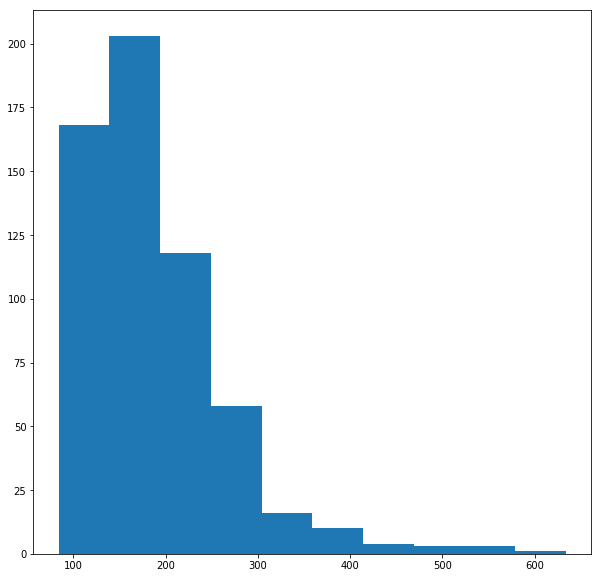

In [12]:
# View the distribution of word counts within essays
plt.hist(word_counts_list)

That's kind of ugly, and what's up with all those arrays and numbers?
<br>Let's clean this up a little bit

The average number of words written is 186.330479


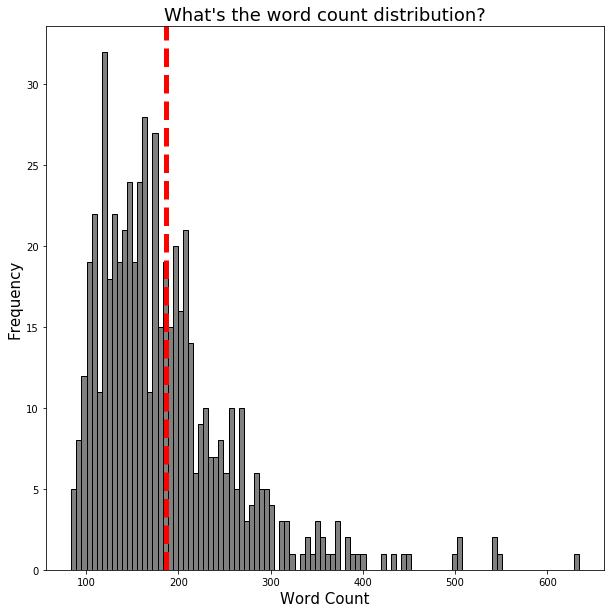

In [13]:
average_word_count = np.mean(word_counts_list)
print('The average number of words written is %0.6f' % average_word_count)

plt.hist(word_counts_list, bins = 100, color = 'grey', edgecolor = 'black')
plt.xlabel('Word Count', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("What's the word count distribution?", fontsize = 18)
plt.axvline(x = average_word_count, lw = 5, color = 'red', linestyle = '--');

# Text Processing

Importing some sklearn functions which are helpful prior to fitting a model

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Data split for evaluation

In [15]:
train_df, test_df = train_test_split(subsetted_df, test_size = 0.2)

Some data conversion
<br>The essays are currently in a Panda's DataFrame column, it would be more reasonable to have them as a vector (`np.ndarray`) of strings. This data structure carries less formatting and is more generalizable than a data frame column.

In [16]:
# Converting the Panda's formal dataframe column into a standard vector of strings
train_essays = train_df['essay'].values
test_essays = test_df['essay'].values

train_essays[0]

"Dear fellow human being,\n\nIt is the year 2015 and I am writing this to you in hopes that mankind has changed their ways. We as a whole have royally screwed up the earth. Our earth. With our blind hyper-consumerism and clear disregard for the planet we live on, we have made our home a tough and unhealthy place to live. If we don't take the correct actions now, your earth might be a terrible place to live, and for that, I apologize. There might be constant natural disasters due to climate change, and your world might look closer to that of a movie; post apocalyptic. I have been practicing healthy practices for a while now: recycling, reusing, and trying to be as environmentally friendly as possible. My family is currently saving money so that we can afford an electric vehicle to further reduce our impact on the environment. We're hoping the rest of society follows our examples.\n\nWith all the best,\nA fellow earthling"

Let's get a count of words

In [17]:
word_counter = CountVectorizer()

word_counter.fit(train_essays)

test_word_counts = word_counter.transform(test_essays)
train_word_counts = word_counter.transform(train_essays)
train_word_counts

<467x5308 sparse matrix of type '<class 'numpy.int64'>'
	with 50953 stored elements in Compressed Sparse Row format>

What in the world is that?
<br>Because most words won't be present in any given paragraph, the resulting word counts are mostly zeros. Since it's mostly empty, it's nice to prevent printing out 1000s of zeros, so it is stored as a sparse matrix. We can try to inspect it, but, in reality, it's too much, as shown below.

In [18]:
train_word_counts.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Well, how can we trust this?
<br>We can inspect the attributes that this `word_counter` has learned

In [19]:
learned_words = word_counter.get_feature_names()

print(learned_words[0:10])
print(learned_words[-10:])
print("\nIn total, it learned %0.6f words" % len(word_counter.get_feature_names()))

['000', '002', '01', '02', '10', '100', '10000x', '11', '12', '120']
['yours', 'yourself', 'yrs', 'yyyyyyyyyyy', 'zabiah', 'zayna', 'zero', 'zoo', 'zoom', 'zzzzzzzzzzz']

In total, it learned 5308.000000 words


What are the individual word counts?

In [20]:
word_counter.vocabulary_

{'dear': 1221,
 'fellow': 1843,
 'human': 2373,
 'being': 518,
 'it': 2618,
 'is': 2604,
 'the': 4720,
 'year': 5284,
 '2015': 43,
 'and': 297,
 'am': 279,
 'writing': 5269,
 'this': 4747,
 'to': 4790,
 'you': 5292,
 'in': 2456,
 'hopes': 2348,
 'that': 4718,
 'mankind': 2962,
 'has': 2236,
 'changed': 803,
 'their': 4723,
 'ways': 5142,
 'we': 5143,
 'as': 376,
 'whole': 5192,
 'have': 2243,
 'royally': 4112,
 'screwed': 4196,
 'up': 4974,
 'earth': 1503,
 'our': 3366,
 'with': 5221,
 'blind': 581,
 'hyper': 2398,
 'consumerism': 1039,
 'clear': 871,
 'disregard': 1400,
 'for': 1940,
 'planet': 3535,
 'live': 2857,
 'on': 3321,
 'made': 2926,
 'home': 2333,
 'tough': 4817,
 'unhealthy': 4942,
 'place': 3529,
 'if': 2413,
 'don': 1430,
 'take': 4648,
 'correct': 1092,
 'actions': 146,
 'now': 3271,
 'your': 5297,
 'might': 3057,
 'be': 482,
 'terrible': 4703,
 'apologize': 325,
 'there': 4730,
 'constant': 1033,
 'natural': 3184,
 'disasters': 1371,
 'due': 1483,
 'climate': 877,
 'cha

# Logistic Regression Model

Importing some sklearn functions that are important to fitting a model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Getting the target variables in a less-formated structure

In [22]:
test_Y = test_df['educ'].values
train_Y = train_df['educ'].values

Fitting a logistic regression model based on 5-fold cross validation grid search with several regularization options

In [23]:
classifier = LogisticRegression()
regularization_options = [{'C': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}]
gs_classifier = GridSearchCV(classifier, regularization_options, cv = 5)

gs_classifier.fit(X = train_word_counts, y = train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Model Evaluation

Importing some sklearn functions that are helpful after fitting a model

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Train set - In sample

Determining the training set accuracy

In [25]:
train_predictions = gs_classifier.predict(X = train_word_counts)

accuracy_score(train_predictions, train_Y)

0.6916488222698073

Viewing the confusion matrix

In [26]:
confusion_matrix(train_predictions, train_Y)

array([[111,  32],
       [112, 212]])

### Test set - Out of sample

In [27]:
test_predictions = gs_classifier.predict(X = test_word_counts)

accuracy_score(test_predictions, test_Y)

0.5213675213675214

In [28]:
confusion_matrix(test_predictions, test_Y)

array([[18, 13],
       [43, 43]])

# Further Explorations - Part 2

What if we look at word pair counts, rather than word counts?

## Text Processing II

In [30]:
word_counter2 = CountVectorizer(ngram_range = (1, 2))

word_counter2.fit(train_essays)

test_word_counts2 = word_counter2.transform(test_essays)
train_word_counts2 = word_counter2.transform(train_essays)
train_word_counts2

<467x41940 sparse matrix of type '<class 'numpy.int64'>'
	with 127271 stored elements in Compressed Sparse Row format>

## Logistic Regression Model II

In [31]:
classifier = LogisticRegression()
regularization_options = [{'C': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}]
gs_classifier2 = GridSearchCV(classifier, regularization_options, cv = 5)

gs_classifier2.fit(X = train_word_counts2, y = train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Model Evaluation II

### Test set - In sample

In [32]:
train_predictions2 = gs_classifier2.predict(X = train_word_counts2)

accuracy_score(train_predictions2, train_Y)

0.7965738758029979

In [33]:
confusion_matrix(train_predictions2, train_Y)

array([[143,  15],
       [ 80, 229]])

### Train set - Out of sample

In [34]:
test_predictions2 = gs_classifier2.predict(X = test_word_counts2)

accuracy_score(test_predictions2, test_Y)

0.5213675213675214

In [35]:
confusion_matrix(test_predictions2, test_Y)

array([[18, 13],
       [43, 43]])

# Further Explorations - Part 3

... And word triplet counts?

## Text Processing III

In [36]:
word_counter3 = CountVectorizer(ngram_range = (1, 3))

word_counter3.fit(train_essays)

test_word_counts3 = word_counter3.transform(test_essays)
train_word_counts3 = word_counter3.transform(train_essays)
train_word_counts3

<467x106370 sparse matrix of type '<class 'numpy.int64'>'
	with 206559 stored elements in Compressed Sparse Row format>

## Logistic Regression  Model III

In [37]:
classifier = LogisticRegression()
regularization_options = [{'C': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}]
gs_classifier3 = GridSearchCV(classifier, regularization_options, cv = 5)

gs_classifier3.fit(X = train_word_counts3, y = train_Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Model Evaluation III

### Test set - In sample

In [38]:
train_predictions3 = gs_classifier3.predict(X = train_word_counts3)

accuracy_score(train_predictions3, train_Y)

0.860813704496788

In [39]:
confusion_matrix(train_predictions3, train_Y)

array([[166,   8],
       [ 57, 236]])

### Test set - Out of sample

In [40]:
test_predictions3 = gs_classifier3.predict(X = test_word_counts3)

accuracy_score(test_predictions3, test_Y)

0.5384615384615384

In [41]:
confusion_matrix(test_predictions3, test_Y)

array([[18, 11],
       [43, 45]])

### What'd it learn?

In [44]:
learned_word_triplets = word_counter3.get_feature_names()
learned_word_triplets[0:10]

['000',
 '000 square',
 '000 square foot',
 '000 years',
 '000 years ago',
 '000 years and',
 '000 years there',
 '002',
 '002 of',
 '002 of degree']

In [45]:
args = np.argsort(gs_classifier3.best_estimator_.coef_[0])
for a in args:
    print(" %s: %0.4f" % (learned_word_triplets[a], gs_classifier3.best_estimator_.coef_[0][a]))

 can: -0.0253
 now: -0.0207
 more: -0.0200
 our: -0.0198
 as: -0.0184
 earth: -0.0147
 what: -0.0146
 we: -0.0145
 when: -0.0142
 you: -0.0134
 year: -0.0122
 sure: -0.0121
 all: -0.0118
 so: -0.0117
 you can: -0.0115
 the world: -0.0107
 used: -0.0107
 done: -0.0103
 world: -0.0103
 if we: -0.0095
 having: -0.0090
 make: -0.0090
 using: -0.0089
 are: -0.0089
 keep: -0.0088
 right: -0.0087
 with: -0.0086
 out: -0.0086
 love you: -0.0084
 things: -0.0083
 on: -0.0082
 and: -0.0081
 the year: -0.0081
 if: -0.0079
 only: -0.0077
 panels: -0.0076
 to keep: -0.0076
 right now: -0.0075
 planet: -0.0074
 solar: -0.0072
 solar panels: -0.0072
 nature: -0.0072
 will be: -0.0070
 well: -0.0070
 part: -0.0067
 put: -0.0067
 writing: -0.0066
 as well: -0.0064
 and more: -0.0064
 for: -0.0064
 from: -0.0063
 he: -0.0063
 everything: -0.0062
 ll: -0.0062
 into: -0.0062
 to our: -0.0062
 always: -0.0060
 will: -0.0060
 have done: -0.0059
 your: -0.0059
 looking: -0.0058
 so that: -0.0058
 been: -0.00

 of recycling and: -0.0009
 profit and: -0.0009
 want to tell: -0.0009
 but one person: -0.0009
 doing small: -0.0009
 becomes: -0.0009
 love you am: -0.0009
 steps like these: -0.0009
 45: -0.0009
 help make: -0.0009
 were doing to: -0.0009
 we were doing: -0.0009
 what we were: -0.0009
 take measures: -0.0009
 very much and: -0.0009
 we reduce: -0.0009
 ability to: -0.0009
 are easier: -0.0009
 world has: -0.0009
 changes think it: -0.0009
 changes think: -0.0009
 panels but: -0.0009
 solar panels but: -0.0009
 need to treat: -0.0009
 to treat: -0.0009
 so hard: -0.0009
 so hard to: -0.0009
 see it as: -0.0009
 and solar: -0.0009
 the bathroom: -0.0009
 would not have: -0.0009
 bathroom: -0.0009
 to inhabit: -0.0009
 humans living: -0.0009
 live long healthy: -0.0009
 hope my generation: -0.0009
 some research: -0.0009
 but sure: -0.0009
 we added: -0.0009
 got to: -0.0009
 impact on how: -0.0009
 the waste: -0.0009
 of the past: -0.0009
 hopefully all of: -0.0009
 hopefully all: -0.

 it proven: -0.0005
 that will affect: -0.0005
 of thinking is: -0.0005
 part in fixing: -0.0005
 or not and: -0.0005
 or global warming: -0.0005
 or global: -0.0005
 again we: -0.0005
 time again: -0.0005
 time again we: -0.0005
 again we as: -0.0005
 pocket 100 year: -0.0005
 very much about: -0.0005
 pocket 100: -0.0005
 okay so: -0.0005
 play part in: -0.0005
 change or global: -0.0005
 time and time: -0.0005
 okay so going: -0.0005
 what do know: -0.0005
 know very much: -0.0005
 know very: -0.0005
 change simply: -0.0005
 play part: -0.0005
 pocket: -0.0005
 one it seems: -0.0005
 wether we like: -0.0005
 in the idea: -0.0005
 didn have access: -0.0005
 didn have cars: -0.0005
 it proven wrong: -0.0005
 it seems ridiculous: -0.0005
 affects all of: -0.0005
 cell phone: -0.0005
 cell phone right: -0.0005
 the idea that: -0.0005
 like it or: -0.0005
 like everyone is: -0.0005
 in their pocket: -0.0005
 like everyone: -0.0005
 climate change simply: -0.0005
 phone: -0.0005
 phone ri

 but try to: -0.0005
 make tiny: -0.0005
 but try: -0.0005
 recycler conserve energy: -0.0005
 to reconcile: -0.0005
 when your living: -0.0005
 family that the: -0.0005
 change with our: -0.0005
 to reconcile climate: -0.0005
 anything good in: -0.0005
 point imagine: -0.0005
 constantly by using: -0.0005
 constantly by: -0.0005
 and probably taking: -0.0005
 environment an: -0.0005
 gasses when: -0.0005
 will be amplified: -0.0005
 anything good: -0.0005
 creature: -0.0005
 creature comforts: -0.0005
 that the creature: -0.0005
 creature comforts enjoy: -0.0005
 2050 when your: -0.0005
 disaster try: -0.0005
 to be shifting: -0.0005
 see anything: -0.0005
 the creature: -0.0005
 really struggle to: -0.0005
 the tide seems: -0.0005
 products and making: -0.0005
 energy constantly: -0.0005
 energy constantly by: -0.0005
 disaster try everyday: -0.0005
 are off when: -0.0005
 conserve energy constantly: -0.0005
 struggle to see: -0.0005
 year 2050 when: -0.0005
 shifting right: -0.0005


 even though clear: -0.0005
 ever produced: -0.0005
 rejected: -0.0005
 atone: -0.0005
 and finally climate: -0.0005
 awful world: -0.0005
 awful world you: -0.0005
 replace christianity which: -0.0005
 change many people: -0.0005
 change many: -0.0005
 to its rules: -0.0005
 continued their: -0.0005
 falling for them: -0.0005
 inhabit try: -0.0005
 falling for: -0.0005
 inhabit try not: -0.0005
 means of telling: -0.0005
 continued their march: -0.0005
 finally climate: -0.0005
 is important to: -0.0005
 this year we: -0.0005
 plastic water bottle: -0.0005
 gas and get: -0.0005
 bottle and throwing: -0.0005
 bottle and: -0.0005
 house to be: -0.0005
 was spending on: -0.0005
 that take to: -0.0005
 gas mileage changed: -0.0005
 print even more: -0.0005
 day that way: -0.0005
 print even: -0.0005
 to work every: -0.0005
 it great don: -0.0005
 car with: -0.0005
 hello have already: -0.0005
 hello have: -0.0005
 that take: -0.0005
 bottle that: -0.0005
 about water: -0.0005
 foot print 

 that cleaners: -0.0005
 and detergents so: -0.0005
 pay off: -0.0005
 pay off in: -0.0005
 cleaners and detergents: -0.0005
 cleaners and: -0.0005
 off in: -0.0005
 cleaners normally: -0.0005
 off in the: -0.0005
 cleaners normally come: -0.0005
 have insulated our: -0.0005
 our time in: -0.0005
 would pay: -0.0005
 windows reuse many: -0.0005
 windows reuse: -0.0005
 hazardous chemicals: -0.0005
 wee have insulated: -0.0005
 wee have: -0.0005
 would pay off: -0.0005
 home wee have: -0.0005
 home wee: -0.0005
 and not continually: -0.0005
 detergents: -0.0005
 have taken measures: -0.0005
 detergents so: -0.0005
 wee: -0.0005
 as many things: -0.0005
 detergents so that: -0.0005
 hazardous chemicals and: -0.0005
 if everyone took: -0.0005
 wasteful if everyone: -0.0005
 buying hazardous: -0.0005
 to make many: -0.0005
 reuse many items: -0.0005
 are not buying: -0.0005
 choose to make: -0.0005
 many things as: -0.0005
 choose not to: -0.0005
 choose not: -0.0005
 at home wee: -0.0005


 nature will: -0.0005
 this problem can: -0.0005
 filling up the: -0.0005
 moot hopefuly: -0.0005
 are people who: -0.0005
 to purchase more: -0.0005
 purchase more: -0.0005
 letter yeah do: -0.0005
 letter yeah: -0.0005
 the irony in: -0.0005
 and suppose cut: -0.0005
 believe could: -0.0005
 honestly didn: -0.0005
 drive anyway recycle: -0.0005
 waste paper on: -0.0005
 honestly didn believe: -0.0005
 paper on: -0.0005
 and sending: -0.0005
 paper on silly: -0.0005
 believe could make: -0.0005
 letters: -0.0005
 don waste paper: -0.0005
 don waste: -0.0005
 drive anyway: -0.0005
 difference rarely: -0.0005
 like writing letters: -0.0005
 like writing: -0.0005
 own home to: -0.0005
 difference rarely drive: -0.0005
 recycle as it: -0.0005
 letters and: -0.0005
 effort to lower: -0.0005
 on silly: -0.0005
 on silly things: -0.0005
 and sending them: -0.0005
 waste paper: -0.0005
 sending them: -0.0005
 sending them through: -0.0005
 sending: -0.0005
 resources of course: -0.0005
 them 

 if we weren: -0.0005
 2050 right: -0.0005
 your grandparents generation: -0.0005
 without big changes: -0.0005
 school right now: -0.0005
 changes however can: -0.0005
 changes however: -0.0005
 did love alex: -0.0005
 too badly if: -0.0005
 re really: -0.0005
 re really struggling: -0.0005
 and we didn: -0.0005
 changes at the: -0.0005
 didn screw up: -0.0005
 really struggling: -0.0005
 did if we: -0.0005
 did if: -0.0005
 up the world: -0.0005
 to be things: -0.0005
 potential for climate: -0.0005
 go into politics: -0.0005
 is actually going: -0.0005
 our way while: -0.0005
 big enough difference: -0.0005
 do like making: -0.0005
 in time sorry: -0.0005
 we did if: -0.0005
 generation won get: -0.0005
 generation won: -0.0005
 the potential for: -0.0005
 do it and: -0.0005
 if confident: -0.0005
 wants to go: -0.0005
 in our way: -0.0005
 can my: -0.0005
 can my husband: -0.0005
 who will do: -0.0005
 however can my: -0.0005
 however can: -0.0005
 big enough: -0.0005
 place than w

 friendly option: -0.0004
 friendly option drive: -0.0004
 much my next: -0.0004
 lifestyles hopefully: -0.0004
 lifestyles hopefully still: -0.0004
 the eco friendly: -0.0004
 changes me: -0.0004
 changes me and: -0.0004
 actions will be: -0.0004
 actions will: -0.0004
 30 and don: -0.0004
 by you for: -0.0004
 real problem use: -0.0004
 and her can: -0.0004
 change and wanted: -0.0004
 look hope: -0.0004
 buy you: -0.0004
 used and saved: -0.0004
 look hope ya: -0.0004
 eco friendly car: -0.0004
 eco friendly option: -0.0004
 equals savings turn: -0.0004
 and lights when: -0.0004
 hopefully my wife: -0.0004
 equals savings: -0.0004
 when shop: -0.0004
 less than use: -0.0004
 smarter by: -0.0004
 my appliance: -0.0004
 my appliance off: -0.0004
 for short: -0.0004
 it 12: -0.0004
 for short time: -0.0004
 but that because: -0.0004
 it 12 30: -0.0004
 love drew: -0.0004
 hope ya ll: -0.0004
 drew: -0.0004
 wife when: -0.0004
 re used and: -0.0004
 when shop in: -0.0004
 drive less tha

 safe for you: -0.0004
 steps in my: -0.0004
 keep you: -0.0004
 from facing: -0.0004
 from facing these: -0.0004
 now that can: -0.0004
 these wind and: -0.0004
 little we thought: -0.0004
 that didn do: -0.0004
 fuels would: -0.0004
 worth the effort: -0.0004
 thought fossil fuels: -0.0004
 made very small: -0.0004
 personally to keep: -0.0004
 fossil fuels would: -0.0004
 what we knew: -0.0004
 safe for: -0.0004
 fuels would never: -0.0004
 knew in: -0.0004
 hearts was best: -0.0004
 our hearts was: -0.0004
 hearts: -0.0004
 more personally to: -0.0004
 to keep you: -0.0004
 so expensive: -0.0004
 could have made: -0.0004
 we thought fossil: -0.0004
 hearts was: -0.0004
 run out and: -0.0004
 solar power seemed: -0.0004
 not worth the: -0.0004
 keep you from: -0.0004
 not worth: -0.0004
 facing hardships now: -0.0004
 and not worth: -0.0004
 and never destroy: -0.0004
 facing hardships: -0.0004
 run out: -0.0004
 you sorry: -0.0004
 destroy the earth: -0.0004
 to plant trees: -0.000

 we emit goes: -0.0004
 day long: -0.0004
 day long even: -0.0004
 things are starting: -0.0004
 weather do unthinkable: -0.0004
 day it will: -0.0004
 and builds: -0.0004
 do every: -0.0004
 unthinkable things don: -0.0004
 and one day: -0.0004
 older than am: -0.0004
 factories and smoking: -0.0004
 climate control hope: -0.0004
 affect things: -0.0004
 you climate change: -0.0004
 it comes from: -0.0004
 writing this whenever: -0.0004
 heat but unfortunately: -0.0004
 heat but: -0.0004
 you climate: -0.0004
 it is greenhouse: -0.0004
 that okay: -0.0004
 we were to: -0.0004
 will make our: -0.0004
 past love you: -0.0004
 big deal here: -0.0004
 every single day: -0.0004
 to us with: -0.0004
 things don want: -0.0004
 things don: -0.0004
 15 years older: -0.0004
 leave only: -0.0004
 that my start: -0.0004
 leave only the: -0.0004
 older than: -0.0004
 that okay because: -0.0004
 gas we emit: -0.0004
 know we haven: -0.0004
 this planet and: -0.0004
 helping climate: -0.0004
 this w

 or when: -0.0004
 be swapping: -0.0004
 being outdoors as: -0.0004
 time and just: -0.0004
 be biking to: -0.0004
 be biking: -0.0004
 or paper we: -0.0004
 is flowing in: -0.0004
 we ll also: -0.0004
 off as we: -0.0004
 when weather permits: -0.0004
 when weather: -0.0004
 adverse: -0.0004
 to be can: -0.0004
 really sacrifice for: -0.0004
 just always: -0.0004
 really sacrifice: -0.0004
 ll be using: -0.0004
 for the small: -0.0004
 really nice maybe: -0.0004
 really nice: -0.0004
 will your: -0.0004
 and just walk: -0.0004
 paper we ll: -0.0004
 will your mom: -0.0004
 light is: -0.0004
 as prefer the: -0.0004
 topic and it: -0.0004
 take our time: -0.0004
 adverse affects: -0.0004
 mom do for: -0.0004
 here thinking about: -0.0004
 in the windows: -0.0004
 it isn really: -0.0004
 living thing: -0.0004
 living thing on: -0.0004
 really something that: -0.0004
 needed as natural: -0.0004
 needed as: -0.0004
 really aren needed: -0.0004
 adverse affects so: -0.0004
 permits: -0.0004

 can still live: -0.0002
 your family that: -0.0002
 could help our: -0.0002
 to teach your: -0.0002
 have to teach: -0.0002
 because if we: -0.0002
 something isnt: -0.0002
 climate is getting: -0.0002
 showers and drove: -0.0002
 good enviroment: -0.0002
 drove energy: -0.0002
 drove energy cars: -0.0002
 good enviroment but: -0.0002
 in good enviroment: -0.0002
 will change tremeoudously: -0.0002
 tyler our: -0.0002
 something isnt done: -0.0002
 but you have: -0.0002
 this enviroment will: -0.0002
 this enviroment: -0.0002
 helping so: -0.0002
 afraid by: -0.0002
 the enviroment will: -0.0002
 afraid by the: -0.0002
 start helping: -0.0002
 start helping so: -0.0002
 situation you: -0.0002
 situation you can: -0.0002
 and drove energy: -0.0002
 and drove: -0.0002
 man if: -0.0002
 also start helping: -0.0002
 man if we: -0.0002
 to man if: -0.0002
 thing because: -0.0002
 can also start: -0.0002
 getting worse due: -0.0002
 dear tyler our: -0.0002
 also start: -0.0002
 just recycle

 that as you: 0.0001
 down trees: 0.0001
 practically: 0.0001
 had these: 0.0001
 has always: 0.0001
 was built: 0.0001
 and soon: 0.0001
 are doing great: 0.0001
 doing great: 0.0001
 governments and: 0.0001
 will effect: 0.0001
 threat to our: 0.0001
 as an: 0.0001
 change people: 0.0001
 climate change people: 0.0001
 recycles: 0.0001
 with climate change: 0.0001
 and prosperous: 0.0001
 the coal: 0.0001
 cutting down: 0.0001
 hope you are: 0.0001
 long time: 0.0001
 have noticed: 0.0001
 my great: 0.0001
 anywhere: 0.0001
 we grow: 0.0001
 was for you: 0.0001
 better love: 0.0001
 as should: 0.0001
 lessen the: 0.0001
 to reduce the: 0.0001
 or led: 0.0001
 to stop climate: 0.0001
 mean that: 0.0001
 smaller: 0.0001
 taking public: 0.0001
 back to the: 0.0001
 be extinct: 0.0001
 health: 0.0001
 us did: 0.0001
 as result: 0.0001
 that this will: 0.0001
 the sun: 0.0001
 thrive: 0.0001
 even if it: 0.0001
 to break: 0.0001
 environmental protection: 0.0001
 where it: 0.0001
 to whom

 are distributed and: 0.0003
 preserve our world: 0.0003
 worked to recycle: 0.0003
 while are affecting: 0.0003
 while may be: 0.0003
 initiatives and countries: 0.0003
 house that will: 0.0003
 small footprint: 0.0003
 on to impact: 0.0003
 place we call: 0.0003
 to disrupt society: 0.0003
 relocation: 0.0003
 place without: 0.0003
 initiatives and: 0.0003
 place without intervention: 0.0003
 to disrupt: 0.0003
 the house that: 0.0003
 towards greener energy: 0.0003
 towards greener: 0.0003
 this is not: 0.0003
 worse that: 0.0003
 change has begun: 0.0003
 can enjoy this: 0.0003
 purchasing smart: 0.0003
 somewhat of bubble: 0.0003
 more intense weather: 0.0003
 longest drought in: 0.0003
 to impact our: 0.0003
 longest drought: 0.0003
 the billion people: 0.0003
 longest: 0.0003
 the billion: 0.0003
 by world: 0.0003
 submerged maldives countries: 0.0003
 no plastic: 0.0003
 made 2050 better: 0.0003
 transportation however: 0.0003
 transportation however this: 0.0003
 by world gove

 hand the threat: 0.0003
 believe however: 0.0003
 interesting industry: 0.0003
 they are today: 0.0003
 interesting industry to: 0.0003
 believe however it: 0.0003
 have adapted: 0.0003
 government is regulating: 0.0003
 have adapted currently: 0.0003
 fuel efficient that: 0.0003
 to be addressed: 0.0003
 that of gas: 0.0003
 terms of emissions: 0.0003
 is an economical: 0.0003
 risk although not: 0.0003
 risk although: 0.0003
 hand the: 0.0003
 generation has: 0.0003
 when was: 0.0003
 to affect the: 0.0003
 real enough to: 0.0003
 are so far: 0.0003
 eventually cause major: 0.0003
 quite feel real: 0.0003
 is danger: 0.0003
 be honest here: 0.0003
 stupid know: 0.0003
 quite feel: 0.0003
 for acting: 0.0003
 way too for: 0.0003
 about it like: 0.0003
 feel real: 0.0003
 driving less hope: 0.0003
 for acting like: 0.0003
 the road that: 0.0003
 will eventually cause: 0.0003
 is danger but: 0.0003
 feel real enough: 0.0003
 danger that doesn: 0.0003
 than minor: 0.0003
 think they wil

 renter which: 0.0003
 with 4wd would: 0.0003
 to the fullest: 0.0003
 but not battery: 0.0003
 in electricity: 0.0003
 because would: 0.0003
 would go with: 0.0003
 that your money: 0.0003
 because would be: 0.0003
 me an: 0.0003
 since have no: 0.0003
 environment is important: 0.0003
 me an suv: 0.0003
 more about saving: 0.0003
 fullest: 0.0003
 renter which means: 0.0003
 fullest for: 0.0003
 be honest with: 0.0003
 best for me: 0.0003
 since have: 0.0003
 environment at: 0.0003
 is to go: 0.0003
 limits to me: 0.0003
 environment at the: 0.0003
 to pay 200: 0.0003
 lighting and solar: 0.0003
 go with led: 0.0003
 had choice would: 0.0003
 charge it: 0.0003
 cost less: 0.0003
 in electricity and: 0.0003
 cost less in: 0.0003
 battery operated: 0.0003
 ground clearance vehicle: 0.0003
 ground clearance: 0.0003
 200 month: 0.0003
 battery operated car: 0.0003
 environment even though: 0.0003
 with 4wd: 0.0003
 go with closed: 0.0003
 your money is: 0.0003
 would be able: 0.0003
 is 

 which sure you: 0.0004
 in years though: 0.0004
 melting governments: 0.0004
 landfills with garbage: 0.0004
 to my everyday: 0.0004
 need the trees: 0.0004
 be driving around: 0.0004
 for the recycling: 0.0004
 an opportunity to: 0.0004
 public make statement: 0.0004
 of the house: 0.0004
 get an opportunity: 0.0004
 and destroying our: 0.0004
 paper for: 0.0004
 paper for the: 0.0004
 gasolines that: 0.0004
 your life dreams: 0.0004
 was recycling: 0.0004
 applied to my: 0.0004
 emission controlled: 0.0004
 of gasolines: 0.0004
 at the chance: 0.0004
 fuel by driving: 0.0004
 goodwill so: 0.0004
 statement on this: 0.0004
 controlled vehicle by: 0.0004
 are using some: 0.0004
 controlled vehicle: 0.0004
 other people may: 0.0004
 and highways: 0.0004
 to produce gasoline: 0.0004
 aluminum paper for: 0.0004
 and highways you: 0.0004
 which saves on: 0.0004
 was recycling bottles: 0.0004
 many things people: 0.0004
 controlled: 0.0004
 aluminum paper: 0.0004
 of gasolines that: 0.0004

 gore noted liar: 0.0004
 global warming in: 0.0004
 were all going: 0.0004
 global warming to: 0.0004
 talk about more: 0.0004
 dust off: 0.0004
 dust off global: 0.0004
 warming honestly at: 0.0004
 propaganda battle going: 0.0004
 propaganda battle: 0.0004
 all going to: 0.0004
 years al: 0.0004
 would melt in: 0.0004
 climate change all: 0.0004
 have changed the: 0.0004
 warned of the: 0.0004
 came and: 0.0004
 was fierce: 0.0004
 the gullible and: 0.0004
 scare the gullible: 0.0004
 growing so now: 0.0004
 scare the: 0.0004
 earth would: 0.0004
 happen so they: 0.0004
 happen so: 0.0004
 happen in ten: 0.0004
 gullible: 0.0004
 gullible and: 0.0004
 try global: 0.0004
 try global warming: 0.0004
 manipulate: 0.0004
 professors even celebrities: 0.0004
 professors even: 0.0004
 professors: 0.0004
 manipulate the: 0.0004
 manipulate the masses: 0.0004
 it is climate: 0.0004
 came and went: 0.0004
 was fierce propaganda: 0.0004
 to death: 0.0004
 scarier: 0.0004
 the ten years: 0.000

 first to believe: 0.0004
 had fear that: 0.0004
 seriously know: 0.0004
 in hot: 0.0004
 together love: 0.0004
 their ways but: 0.0004
 years like: 0.0004
 representatives and: 0.0004
 my representatives and: 0.0004
 to if climate: 0.0004
 and second to: 0.0004
 imagine you: 0.0004
 for research into: 0.0004
 to have what: 0.0004
 trying to use: 0.0004
 have clear: 0.0004
 have clear cut: 0.0004
 you aunt: 0.0004
 have made these: 0.0004
 unsafe: 0.0004
 for research: 0.0004
 no more bottled: 0.0004
 you could be: 0.0004
 unsafe with: 0.0004
 have what: 0.0004
 the what fear: 0.0004
 the what: 0.0004
 unsafe with animals: 0.0004
 and making things: 0.0004
 resources like no: 0.0004
 the world might: 0.0004
 into renewable: 0.0004
 too or plan: 0.0004
 too or: 0.0004
 resources like: 0.0004
 hardly imagine: 0.0004
 hardly imagine you: 0.0004
 the science and: 0.0004
 future together love: 0.0004
 into renewable forms: 0.0004
 future together: 0.0004
 use renewable resources: 0.0004
 ha

 knowing this: 0.0004
 relied upon by: 0.0004
 relied upon: 0.0004
 carbon dioxide even: 0.0004
 relied: 0.0004
 other byproducts: 0.0004
 and family yet: 0.0004
 ozone layer sorry: 0.0004
 job school and: 0.0004
 large clean domes: 0.0004
 love you your: 0.0004
 humans definitely need: 0.0004
 power our vehicles: 0.0004
 or something: 0.0004
 by product trying: 0.0004
 humans haven: 0.0004
 humans haven destroyed: 0.0004
 or something else: 0.0004
 due to my: 0.0004
 rely on them: 0.0004
 large clean: 0.0004
 you probably don: 0.0004
 we humans haven: 0.0004
 in large clean: 0.0004
 probably living in: 0.0004
 point to point: 0.0004
 probably don need: 0.0004
 domes: 0.0004
 over abundant: 0.0004
 point though imagine: 0.0004
 see layers: 0.0004
 see layers of: 0.0004
 our lives simple: 0.0004
 destroyed the earth: 0.0004
 even knowing: 0.0004
 even knowing this: 0.0004
 smog over your: 0.0004
 smog over: 0.0004
 product trying: 0.0004
 product trying my: 0.0004
 vehicles to get: 0.00

 be hanging around: 0.0004
 say was better: 0.0004
 say was: 0.0004
 be hanging: 0.0004
 fit their: 0.0004
 amazing places: 0.0004
 ripe: 0.0004
 ripe 64: 0.0004
 climate change see: 0.0004
 all safe: 0.0004
 all safe and: 0.0004
 however there is: 0.0004
 however we: 0.0004
 ripe 64 hope: 0.0004
 around that will: 0.0004
 however we could: 0.0004
 all the amazing: 0.0004
 amazing places around: 0.0004
 huge threat: 0.0004
 huge threat to: 0.0004
 an over reliance: 0.0004
 an over: 0.0004
 be doing much: 0.0004
 around this: 0.0004
 to fit their: 0.0004
 or an: 0.0004
 re 35: 0.0004
 or anecdata: 0.0004
 grandpa is one: 0.0004
 grandpa is: 0.0004
 means you re: 0.0004
 your grandpa is: 0.0004
 small contributions we: 0.0004
 small contributions: 0.0004
 wish could say: 0.0004
 job than we: 0.0004
 always know: 0.0004
 doing much more: 0.0004
 doing much: 0.0004
 job than: 0.0004
 to our civilization: 0.0004
 always know that: 0.0004
 changing them however: 0.0004
 consensus that not: 0

 year new: 0.0004
 affected by all: 0.0004
 the environment temperature: 0.0004
 exercise about: 0.0004
 have been affected: 0.0004
 year new cars: 0.0004
 with new electronics: 0.0004
 and the like: 0.0004
 plastic and garbage: 0.0004
 extinct species: 0.0004
 point shifts in: 0.0004
 ve passed are: 0.0004
 that we re: 0.0004
 point shifts: 0.0004
 overshadowed by: 0.0004
 overshadowed by continued: 0.0004
 be very strict: 0.0004
 it frustrating: 0.0004
 have even more: 0.0004
 part of thought: 0.0004
 expect the: 0.0004
 expect the weather: 0.0004
 isn real no: 0.0004
 expecting that: 0.0004
 isn real: 0.0004
 ve passed: 0.0004
 expecting that your: 0.0004
 passed are: 0.0004
 do believe the: 0.0004
 passed are overshadowed: 0.0004
 continued efforts of: 0.0004
 continued efforts: 0.0004
 exercise about climate: 0.0004
 it frustrating that: 0.0004
 the actions of: 0.0004
 hasn been reduced: 0.0004
 have even: 0.0004
 any worse: 0.0004
 evidence there: 0.0004
 people with: 0.0004
 ext

 mileage reducing: 0.0004
 the mini cooper: 0.0004
 dear mason: 0.0004
 reducing not: 0.0004
 reduce our electrical: 0.0004
 became of that: 0.0004
 bought had: 0.0004
 reduce resources: 0.0004
 reduce resources used: 0.0004
 me install: 0.0004
 became of: 0.0004
 influenced your adult: 0.0004
 hold in heat: 0.0004
 that big nasty: 0.0004
 hold in: 0.0004
 that big: 0.0004
 me install insulation: 0.0004
 influenced your: 0.0004
 you were such: 0.0004
 insulation in the: 0.0004
 recycled paper: 0.0004
 are different for: 0.0004
 back then it: 0.0004
 recycled paper products: 0.0004
 decided to quit: 0.0004
 as child is: 0.0004
 plant we could: 0.0004
 bamboo: 0.0004
 had better fuel: 0.0004
 reducing not just: 0.0004
 coal plant we: 0.0004
 home we covered: 0.0004
 mini cooper we: 0.0004
 had better: 0.0004
 mini cooper: 0.0004
 we covered the: 0.0004
 new truck dad: 0.0004
 new truck: 0.0004
 we covered: 0.0004
 from our windows: 0.0004
 stop the deforestation: 0.0004
 could see from: 

 you came into: 0.0005
 you came: 0.0005
 developed in humankind: 0.0005
 developing machines: 0.0005
 developing machines and: 0.0005
 race have left: 0.0005
 of these gases: 0.0005
 since you came: 0.0005
 make difference please: 0.0005
 our living: 0.0005
 transportation and not: 0.0005
 took and: 0.0005
 and cars that: 0.0005
 left our footprint: 0.0005
 been 35: 0.0005
 these devastating effects: 0.0005
 better atmosphere we: 0.0005
 took and this: 0.0005
 these devastating: 0.0005
 as industrialization developed: 0.0005
 regenerate into better: 0.0005
 and took your: 0.0005
 regenerate into: 0.0005
 in humankind: 0.0005
 in humankind history: 0.0005
 and took: 0.0005
 and cars: 0.0005
 these gases the: 0.0005
 the gift from: 0.0005
 released by: 0.0005
 remedy these devastating: 0.0005
 remedy these: 0.0005
 the right choices: 0.0005
 it been 35: 0.0005
 for the immensely: 0.0005
 resources available by: 0.0005
 to create energy: 0.0005
 system to support: 0.0005
 car have: 0.000

 you did please: 0.0005
 me dad: 0.0005
 few minutes but: 0.0005
 me dad and: 0.0005
 enjoy so much: 0.0005
 enjoy so: 0.0005
 have to lather: 0.0005
 fun you love: 0.0005
 behavior your: 0.0005
 much already: 0.0005
 in human behavior: 0.0005
 surroundings it is: 0.0005
 activities you enjoy: 0.0005
 on you just: 0.0005
 did please do: 0.0005
 change is really: 0.0005
 you love singing: 0.0005
 love singing and: 0.0005
 love singing: 0.0005
 it 2015 you: 0.0005
 but without: 0.0005
 lots of fun: 0.0005
 only earth: 0.0005
 your surroundings: 0.0005
 only earth so: 0.0005
 for few minutes: 0.0005
 can conserve: 0.0005
 singing and running: 0.0005
 are going through: 0.0005
 running around: 0.0005
 running around outside: 0.0005
 change in human: 0.0005
 are cute energetic: 0.0005
 it is me: 0.0005
 already have to: 0.0005
 make it last: 0.0005
 activities you: 0.0005
 going through time: 0.0005
 last love: 0.0005
 last love you: 0.0005
 singing and: 0.0005
 of the activities: 0.0005
 y

 our planet are: 0.0008
 agreement to help: 0.0008
 that am trying: 0.0008
 with many: 0.0008
 they are wrong: 0.0008
 our cars and: 0.0008
 real thing: 0.0008
 our choice: 0.0008
 fully realized: 0.0008
 entire family: 0.0008
 and who knows: 0.0008
 be worth: 0.0008
 be worth it: 0.0008
 will be worth: 0.0008
 must take action: 0.0009
 that we must: 0.0009
 many people did: 0.0009
 and our cars: 0.0009
 does feel: 0.0009
 does feel like: 0.0009
 have walked: 0.0009
 also to: 0.0009
 it not much: 0.0009
 not much but: 0.0009
 places have: 0.0009
 also like to: 0.0009
 efficient appliances also: 0.0009
 appliances also: 0.0009
 packaging and: 0.0009
 battery powered: 0.0009
 we must do: 0.0009
 making an: 0.0009
 weather as: 0.0009
 drive our: 0.0009
 help keep things: 0.0009
 things from getting: 0.0009
 from getting: 0.0009
 things from: 0.0009
 keep things from: 0.0009
 and to try: 0.0009
 can do better: 0.0009
 of air: 0.0009
 or by: 0.0009
 gasses and: 0.0009
 is hot topic: 0.0009


# Distinct Word Processing Methods

## 1. Inverse frequency counting

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
inverse_freq_counter = TfidfVectorizer(ngram_range = (1, 1))

sentence_array = np.array(['I work in CIRES', 'I work at Earth Lab', 'Work is work'])

inverse_freq_counter.fit(sentence_array)
inverse_freq_counter.get_feature_names()

['at', 'cires', 'earth', 'in', 'is', 'lab', 'work']

In [103]:
tf_idf_weightings = inverse_freq_counter.transform(sentence_array)
tf_idf_weightings.todense()

matrix([[0.        , 0.65249088, 0.        , 0.65249088, 0.        ,
         0.        , 0.38537163],
        [0.54645401, 0.        , 0.54645401, 0.        , 0.        ,
         0.54645401, 0.32274454],
        [0.        , 0.        , 0.        , 0.        , 0.64612892,
         0.        , 0.76322829]])

In [104]:
word_counter_proof = CountVectorizer(ngram_range = (1, 1))

word_counter_proof.fit(sentence_array)

word_count_values = word_counter_proof.transform(sentence_array)
word_count_values.todense()

matrix([[0, 1, 0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 2]])

In [ ]:
2. 